In [1]:
import matplotlib.pyplot as plt
import re

In [2]:
datasets = ["cifar10", "mnist", "mnistm", "stl", "svhn", "syn", "usps"]
file_directory = "../../logs/resnet18/"

In [3]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [14]:
def read_file(file_path):
    results = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Pruning ratio" in line:
                line = line.split(":")[3].strip()
                prune_ratio = extract_floats(line)[0]
                results[prune_ratio] = {}
            elif "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                results[prune_ratio][data_ratio] = accuracy
        return results

In [26]:
source = 'mnistm'
target = 'stl'
seed = 1 

org_path = file_directory + f"original/{seed}/admm_" + source + "_to_" + target + ".log"
org_dic = read_file(org_path)
print(org_dic)


{0.01: {0.001: 0.105625, 0.002: 0.10525, 0.005: 0.125, 0.008: 0.13275, 0.01: 0.129625, 0.05: 0.249875, 0.1: 0.325375, 0.2: 0.38575, 0.5: 0.473, 1.0: 0.52875}, 0.1: {0.001: 0.089, 0.002: 0.091625, 0.005: 0.112875, 0.008: 0.129375, 0.01: 0.165625, 0.05: 0.275875, 0.1: 0.349, 0.2: 0.406625, 0.5: 0.476625, 1.0: 0.53525}, 0.5: {0.001: 0.09725, 0.002: 0.11375, 0.005: 0.118625, 0.008: 0.157875, 0.01: 0.190125, 0.05: 0.286, 0.1: 0.35925, 0.2: 0.426, 0.5: 0.490125, 1.0: 0.557}, 0.9: {0.001: 0.104625, 0.002: 0.1, 0.005: 0.130875, 0.008: 0.12775, 0.01: 0.1295, 0.05: 0.2435, 0.1: 0.339375, 0.2: 0.40175, 0.5: 0.480375, 1.0: 0.530375}, 0.95: {0.001: 0.09425, 0.002: 0.096, 0.005: 0.10675, 0.008: 0.124875, 0.01: 0.121875, 0.05: 0.227125, 0.1: 0.30825, 0.2: 0.38875, 0.5: 0.483, 1.0: 0.525625}, 0.98: {0.001: 0.092625, 0.002: 0.10775, 0.005: 0.11475, 0.008: 0.11025, 0.01: 0.108875, 0.05: 0.17825, 0.1: 0.251625, 0.2: 0.341125, 0.5: 0.459375, 1.0: 0.535375}, 0.99: {0.001: 0.09475, 0.002: 0.0965, 0.005: 0.1

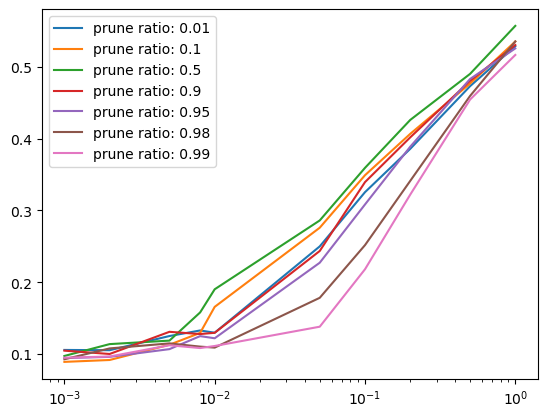

In [27]:
for i, prune_ratio in enumerate(org_dic.keys()):
    dic = org_dic[prune_ratio]
    plt.plot(list(dic.keys()), list(dic.values()), label=f"prune ratio: {prune_ratio}")
# log scale
plt.xscale('log')
plt.legend()